<a href="https://colab.research.google.com/github/palnitin12345/Rossman-Sales-Prediction/blob/main/Rossman_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Rossman Stores Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Made by -**Nitin Pal


# **Project Summary -**

Rossman is based in European continent operating over 3000 drug stores. Currently they predict six weeks of sales in advance. The sales are influeneced by many factors like competition distance, promotions running, school, state holiday and locality. In this project we build a model based on the given data to predict the sales of the stores and get some insights like on which day store must be open for better sales.

# **GitHub Link -**

https://github.com/palnitin12345/Rossman-Sales-Prediction.git

# **Problem Statement**


**Predicting sales of Rossman stores**

# Main code

##**1. Know Your Data**

In [1]:
#Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from scipy import stats

import datetime
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import requests
import io

In [2]:
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/palnitin12345/Rossman-Sales-Prediction/main/Rossmann_Stores_Data.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

url1 = "https://raw.githubusercontent.com/palnitin12345/Rossman-Sales-Prediction/main/store.csv" # Make sure the url is the raw version of the file on GitHub
download1 = requests.get(url1).content

# Reading the downloaded content and turning it into a pandas dataframe

data1 = pd.read_csv(io.StringIO(download.decode('utf-8')))
data2 = pd.read_csv(io.StringIO(download1.decode('utf-8')))

In [3]:
#First look of the data.
data1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
data2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Dataset Rows & Columns count

print(f'Shape of first dataset {data1.shape}')
print(f'Shape of second dataset {data2.shape}')

Shape of first dataset (1017209, 9)
Shape of second dataset (1115, 10)


In [ ]:
#Merging both the dataframes based on Store id.

dataset = data1.merge(data2, on = 'Store',how = 'left')

In [ ]:
print(f'Shape of second dataset {dataset.shape}')

Shape of second dataset (1017209, 18)


In [ ]:
#Looking the datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

Duplicate Values

In [ ]:

#Number of duplicated Rows

len(dataset[dataset.duplicated()])

0

Missing/Null Values

In [ ]:
#Finding null columns in the dataset and percentage of null values.
print("Col     Null values percent")
for col in dataset.columns:
  if dataset[col].notnull().sum() != len(dataset):
    print(f"{col}  :- {round(dataset[col].isnull().sum()*100/len(dataset),2)}")

Col     Null values percent
CompetitionDistance  :- 0.26
CompetitionOpenSinceMonth  :- 31.79
CompetitionOpenSinceYear  :- 31.79
Promo2SinceWeek  :- 49.94
Promo2SinceYear  :- 49.94
PromoInterval  :- 49.94


### What did you know about your dataset?

##**2. Understanding the variables**

In [ ]:
# Dataset Columns

dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe

dataset.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


Variables Description 

1. Store           : unique ID

2. Open            : 0 = store closed, 1 = store open

3. StateHoliday    : holiday. a = public holiday, b = Easter holiday, c =       Christmas, 0 = None

4. SchoolHoliday   : the closure of public schools

5. StoreType       : a, b, c, d

6. Assortment      : assortment level, a = basic, b = extra, c = extended

7. Promo           : store is running a promo on that day

8. Promo2          : 0 = store not participating, 1 = store is participating

9. CompetitionOpenSince[Month/Year]  : approximate year and month of the time, the nearest competitor store was opened

10. Promo2Since[Year/Week]            : describes the year and calendar week when the store started participating in Promo2

11. PromoInterval   : describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.

12. DayOfWeek       : Day of the week, using 1-7 for Mon-Sat

13. Date            : Date in YYYY-MM-DD


14. Sales           : the number of sales of the store that day

15. Customers       : number of customers

16. CompetitionDistance :   distance to the nearest competitor store



Unique Values

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),)

No. of unique values in  Store is 1115
No. of unique values in  DayOfWeek is 7
No. of unique values in  Date is 942
No. of unique values in  Sales is 21734
No. of unique values in  Customers is 4086
No. of unique values in  Open is 2
No. of unique values in  Promo is 2
No. of unique values in  StateHoliday is 5
No. of unique values in  SchoolHoliday is 2
No. of unique values in  StoreType is 4
No. of unique values in  Assortment is 3
No. of unique values in  CompetitionDistance is 654
No. of unique values in  CompetitionOpenSinceMonth is 12
No. of unique values in  CompetitionOpenSinceYear is 23
No. of unique values in  Promo2 is 2
No. of unique values in  Promo2SinceWeek is 24
No. of unique values in  Promo2SinceYear is 7
No. of unique values in  PromoInterval is 3


In [ ]:
#Columns that are categorical in nature

for col in dataset.columns:
  if dataset[col].nunique()<=10:
    print(col)
    print(dataset[col].value_counts())
    print('')

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

Open
1    844392
0    172817
Name: Open, dtype: int64

Promo
0    629129
1    388080
Name: Promo, dtype: int64

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

SchoolHoliday
0    835488
1    181721
Name: SchoolHoliday, dtype: int64

StoreType
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

Assortment
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

Promo2
1    509178
0    508031
Name: Promo2, dtype: int64

Promo2SinceYear
2011.0    115056
2013.0    110464
2014.0     79922
2012.0     73174
2009.0     65270
2010.0     56240
2015.0      9052
Name: Promo2SinceYear, dtype: int64

PromoInterval
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64



##***3. Data Wrangling***

In [ ]:
#State Holiday column has some datatype errors, correcting them.

dataset['StateHoliday'].replace('0','d', inplace=True)
dataset['StateHoliday'].replace(0,'d', inplace=True)


####Handling Null/Missing values

**Competition Distance**

In [ ]:
#%age of null values in Competition Distance column is

dataset['CompetitionDistance'].isnull().sum()*100/len(dataset['CompetitionDistance'])

#Treating Null Values

#Column CompetitionDistance has some null values, so replacing those null values with median of the columnn

dataset['CompetitionDistance'].fillna(dataset['CompetitionDistance'].median(), inplace=True)


**Competition Open Since Year and Month**

In [ ]:
#Column CompetitionOpenSinceMonth and CompetitionOpenSinceYear has some null values, so replacing those null values with mode of the respective columnns.


dataset['CompetitionOpenSinceMonth'].fillna(dataset['CompetitionOpenSinceMonth'].mode()[0],inplace=True)


dataset['CompetitionOpenSinceYear'].fillna(dataset['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [ ]:
#Making a new column,Competition Age with zero values, which will store the years of Competition running.
dataset['Competition_Age'] = 0

#Converting the datatype to int.
dataset['CompetitionOpenSinceMonth'] = dataset['CompetitionOpenSinceMonth'].astype(int)
dataset['CompetitionOpenSinceYear'] = dataset['CompetitionOpenSinceYear'].astype(int)

#making the reference timestamp of now.
now = pd.Timestamp('now')

#Merging the two columns to get the date like format
dataset['Competition_temp'] = dataset['CompetitionOpenSinceMonth'].astype(str) + "/" + dataset['CompetitionOpenSinceYear'].astype(str)

#Converting to datetime
dataset['Competition_temp'] = pd.to_datetime(dataset['Competition_temp'])

#getting the age of the competition.
dataset['Competition_Age'] = (now - dataset['Competition_temp']).astype('<m8[Y]')

#Dropping the unnecessary columns.
dataset.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Competition_temp'],axis=1,inplace=True)

**Promo2**

In [ ]:
#making a function that takes a week number and results the month number.

def week_to_month(t_week):
  t_year = 2000              
  date = str(t_year) + '-W' + str(t_week)
  
  # getting date
  res = datetime.strptime(date + '-1', "%Y-W%W-%w")

  return res.month

In [ ]:
#Now what I want to do is merge three columns Promo2 ones...by calculating the age since when the promo2 started,,, comparing with the sales..and age 0 will imply the store didn't run promo2.

#Making a new column with zero values, Promo2_age, which will store for how much time, the store has been running promotion.
dataset['Promo2_Age'] = 0

#To avoid Valueerrors, filling empty places with 0
dataset['Promo2SinceWeek'].fillna(0, inplace=True)
dataset['Promo2SinceYear'].fillna(0, inplace=True)

#Since both Promo2SinceWeek and Promo2SinceYear are datetime objects so, converting them to int from float for easy calculations.
dataset['Promo2SinceWeek'] = dataset['Promo2SinceWeek'].astype(int)
dataset['Promo2SinceYear'] = dataset['Promo2SinceYear'].astype(int)

#Applying the function to convert weeks to months.
dataset['Promo2SinceMonth'] = dataset['Promo2SinceWeek'].apply(lambda x: 0 if x==0 else week_to_month(x))

#Combining both weeeks and years columns to get a date.
dataset['Promo2_temp'] = dataset['Promo2SinceMonth'].astype(str) + "/" +dataset['Promo2SinceYear'].astype(str)

#Replacing 0/0 values to 0.
dataset['Promo2_temp'].replace('0/0',0, inplace=True)

#Converting to datetime for calculating the age.
dataset['Promo2_temp'] = pd.to_datetime(dataset['Promo2_temp'])

#Calculating the age of Promo2 and saving the year only.
dataset['Promo2_Age'] = (now - dataset['Promo2_temp']).astype('<m8[Y]') 

#Beacuse of null values some values showed 53, so replacing those with 0
dataset['Promo2_Age'].replace(53.0,0,inplace=True)

#Dropping the unecessary columns.
dataset.drop(['Promo2SinceMonth','Promo2SinceYear', 'Promo2SinceWeek','Promo2_temp'],axis=1, inplace=True)

**Date**

In [ ]:
#Here date is object-type, changing it in datetime type andn expanding columns.
dataset["Date"] =  pd.to_datetime(dataset["Date"], format="%Y/%m/%d")

#Extracting month, quarter and year from the date
 
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year
dataset['Quarter'] = dataset['Date'].dt.quarter 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***



#### Chart -1 Sales, Customers and Competition Distance (Univariate)

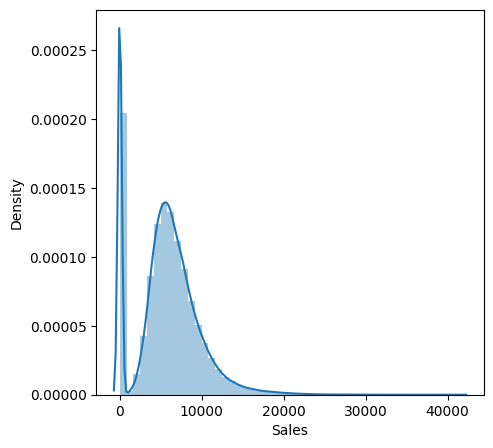

The skewness in Sales is:- 0.6414596158103787
The value of kurtosis for Sales column is 1.7783747472372768


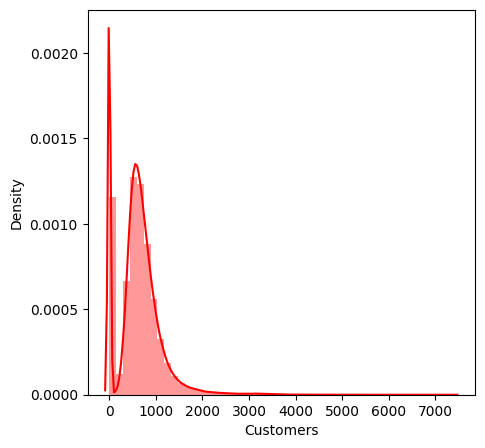

The skewness in Customers is:- 1.5986502899508919
The value of kurtosis for Customers column is 7.091772717755949


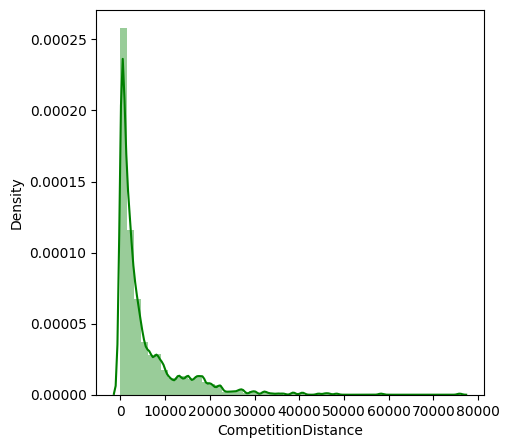

The skewness in Competition Distance is:- 2.9334663226647555
The value of kurtosis for Competition Distance column is 13.040562610287445


In [ ]:
# Chart - 1 visualization code

#Making a distplot of Sales column

plt.subplots(1,1,figsize=(5,5))
sns.distplot(dataset['Sales'])
plt.show()

# From the figure we can see that there is right skewness in Sales Column.
print(f"The skewness in Sales is:- { dataset['Sales'].skew() }")
print(f"The value of kurtosis for Sales column is {dataset['Sales'].kurt()}")


#Making a distplot of Customers column

plt.subplots(1,1,figsize=(5,5))
sns.distplot(dataset['Customers'],color='red')
plt.show()


# From the figure we can see that there is right skewness in Customers Column.

print(f"The skewness in Customers is:- { dataset['Customers'].skew() }")
print(f"The value of kurtosis for Customers column is {dataset['Customers'].kurt()}")


#Making a distplot of CompetitionDistance column

plt.subplots(1,1,figsize=(5,5))
sns.distplot(dataset['CompetitionDistance'], color = 'green')
plt.show()


# From the figure we can see that there is right skewness in Competition Distance Column.

print(f"The skewness in Competition Distance is:- { dataset['CompetitionDistance'].skew() }")
print(f"The value of kurtosis for Competition Distance column is {dataset['CompetitionDistance'].kurt()}")

1. Why did you pick the specific chart?

We used the distplot because it represents the univariate distribution of data. i.e. data distribution of a variable against the density distribution. 
With the help of this plot we can easily see the skewness of each column independently.

 2. What is/are the insight(s) found from the chart?

We found that all the three continuous columns are highly positively skewed.
The positively skewed distribution is a distribution where the mean, median, and mode of the distribution are positive rather than negative or zero, i.e., data distribution occurs more on the one side of the scale with a long tail on the right side. 

####Chart - 2 Stores running the promotion 1 and promotion 2 (Univariate)

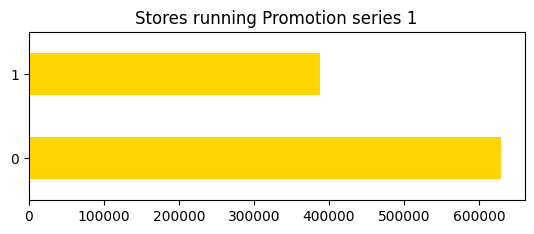

The number of stores running first promotion is:- 388080
The number of stores not running first promotion is:- 629129


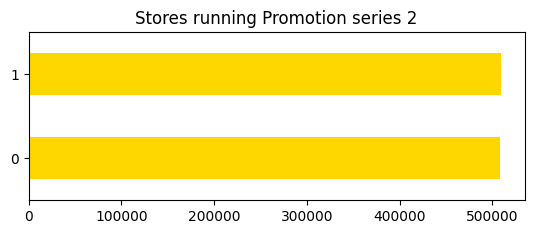

The number of stores running second promotion is:- 509178
The number of stores not running second promotion is:- 508031


In [ ]:
#Chart 2 - visualization code

plt.subplot(2, 1, 1)
dataset['Promo'].value_counts().sort_index().plot(kind='barh',color='gold')
plt.title("Stores running Promotion series 1")
plt.show()

print(f"The number of stores running first promotion is:- {dataset['Promo'].value_counts()[1]}")
print(f"The number of stores not running first promotion is:- {dataset['Promo'].value_counts()[0]}")

plt.subplot(2, 1, 2)
dataset['Promo2'].value_counts().sort_index().plot(kind='barh',color='gold')
plt.title("Stores running Promotion series 2")
plt.show()

print(f"The number of stores running second promotion is:- {dataset['Promo2'].value_counts()[1]}")
print(f"The number of stores not running second promotion is:- {dataset['Promo2'].value_counts()[0]}")


1. Why did you pick the specific chart?

We have used horizontal bar graphs because the labels are easier to display. In addition, they are more suitable for display on a small space in the case of a large data set.
A horizontal bar chart is a graph in the form of rectangular bars.
The length of these bars is proportional to the values they represent. The vertical axis represents the categories being compared, while the horizontal axis represents a value.


 2. What is/are the insight(s) found from the chart?

From the above comparisons we found that more stores have run the second promotion. In the first promotion series only 388,080 stores ran the promotion but in the second series 509,178 ran the promotion. This is a very high jump.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We get to know that promotion brings sales that is why more stores participated in the second series. To create a positive growth of the stores, more promotion in as many as possible stores should be conducted. This would definitely increase the sales and result in increased revenue.

####Chart 3 - Promo Interval of second series promotion(Bivariate)

Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


<Axes: title={'center': 'Sales in Promotion Series 2'}, xlabel='PromoInterval', ylabel='Overall Sales'>

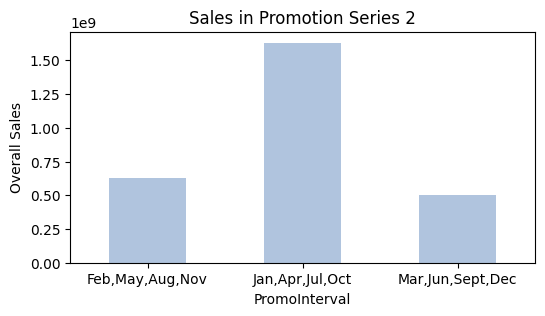

In [ ]:
# Chart - 3 visualization code

print(dataset['PromoInterval'].value_counts())
dataset.groupby(['PromoInterval'])['Sales'].sum().sort_index().plot(kind="bar", title = "Sales in Promotion Series 2", rot =0,figsize=(6, 3),ylabel = "Overall Sales",color='lightsteelblue')

1. Why did you pick the specific chart?

We have chosen bar chart becuase it distinctly depicts the comparison of one age with another. We get a very clear idea of the difference between two classes in a bar chart.


 2. What is/are the insight(s) found from the chart?

We can see clearly that in the months of January, April, July and OCtober the sales are maximum in comparison to other two months. Rest eight months in other two categories have almost same sales. More sales in Jan can be accounted to new year sales , April has easter, November has thanks-giving And October has Holloween.



 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since there are more sales in first category so the rossman should focus on maintaining this boost in the main four months. While on the other hand Rossman should do different type of promotions, because clearly what they have been doing hasn't been working. We can conclude that if we make products in stores festival oriented, the sales should surely increase.

#### Chart 4 - Sales on School Holidays


> Q. Whether school-going children boosts the sales?


**SchoolHoliday** - 0 - School Holiday, 1 - School open

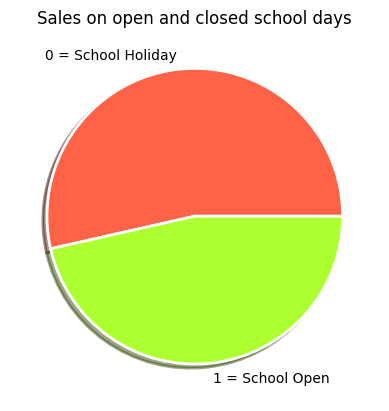

In [ ]:
# Chart - 4 visualization code

df6 = dataset.groupby(['SchoolHoliday'])['Sales'].mean().sort_values(ascending=False)
lab = ['0 = School Holiday','1 = School Open']

plt.pie(df6, labels = lab, shadow=True, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors= ['tomato','greenyellow'])
plt.title("Sales on open and closed school days")
plt.show()

1. Why did you pick the specific chart?

We picked this chart because a pie chart helps organize and show data as a percentage of a whole. And clearly shows the dissimilarity between two levels.

 2. What is/are the insight(s) found from the chart?

The sales on school open and closed are nearly the same. There is not very big difference in sales. 
This tells us that student is not a big part of Rossman Stores consumer base.
This can be accounted by the minimum age for buying drugs in the country.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, for growing business information about audience and type of audience is very important. This gives a slight idea about the audience.

####Chart 5: Store Type and Assortment

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64


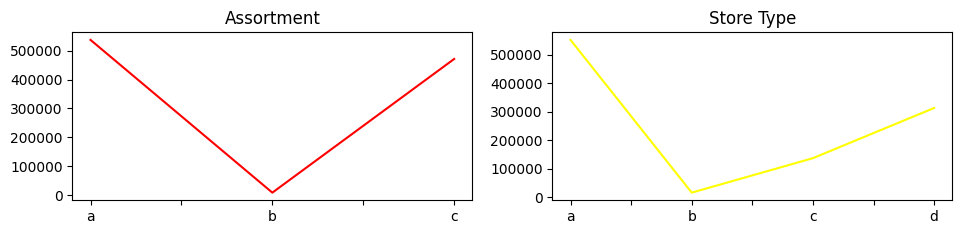

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64


In [ ]:
# Chart - 6 visualization code

print(dataset['Assortment'].value_counts())
plt.subplot(2, 2, 1)
dataset['Assortment'].value_counts().sort_index().plot(kind='line',color='red')
plt.title('Assortment')
plt.xticks(rotation=0)
plt.subplots_adjust(right=1.5)

plt.subplot(2, 2, 2)
dataset['StoreType'].value_counts().sort_index().plot(kind='line', color = 'yellow')
plt.xticks(rotation=0)
plt.title('Store Type')
plt.show()
print(dataset['StoreType'].value_counts())

1. Why did you pick the specific chart?

Line chart expresses the trends, patterns in the best way posssible. That is why we picked the chart to see in the number of stores of a single type and assortment preferred.

 2. What is/are the insight(s) found from the chart?

We can see that most of the stores have assortment category either a or c. Most of the stores do not prefer assortment category b.
And at the same time we can see that most of the stores are of a type in comparison to the other three types.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To get some more profit in business, Rossman can discontinue assortment category b and b store type. The a,c and d type franchises are bought by more people. So Rossman can improve those store types for better sales. 

####Chart 6: Sales on Days(Bivariate)

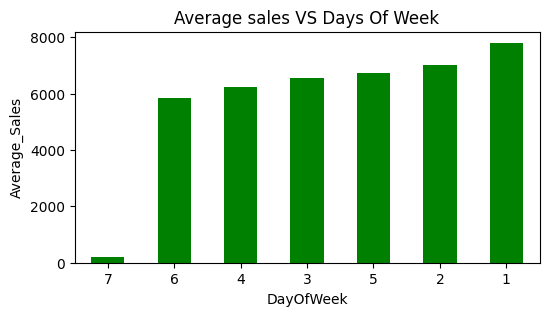

In [ ]:
# Chart - 7 visualization code

#Using groupby, getting the sales vs days of week data.

#Plotting the data.

dataset.groupby(['DayOfWeek'])['Sales'].mean().sort_values().plot(kind="bar", title = "Average sales VS Days Of Week", rot =0, color='green',figsize=(6, 3),ylabel = "Average_Sales")
plt.show()

1. Why did you pick the specific chart?

We have picked this chart because this is clearly showing the difference and somewhere the trends and mentality of the customers.

 2. What is/are the insight(s) found from the chart?

Sunday and Monday seems to have maximum sales throughout the week. Sunday is quite obvious as it is holiday.
Since Mondays also have good sales, this means most of the customers have their day offs on Monday. 
There are low sales during the most of the weekdays, because people would be busy in their work life.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To create a positive business growth, they should promote Sunday and Monday sales through some offers and promotions. The day on which the sales are minimum, they should do repairs on those days only so that sales won't be largely affected.

####Chart 7: Competition Distance affects Sales

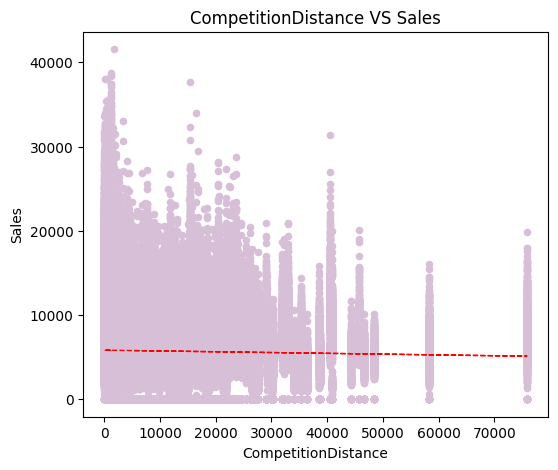

In [ ]:
# Chart - 7 visualization code

dataset.plot(kind="scatter", x="CompetitionDistance",y="Sales",title="CompetitionDistance VS Sales",figsize=(6,5), color = 'thistle')
z = np.polyfit(dataset['CompetitionDistance'], dataset['Sales'], 1)
y_hat = np.poly1d(z)(dataset['CompetitionDistance'])
plt.plot(dataset['CompetitionDistance'], y_hat, "r--", lw=1)
plt.show()

1. Why did you pick the specific chart?

Scatter plots are best when we need to check for linear relationship. That is why we used the scatter plot here and plotted an approximate fit line using polyfit for better understanding.

 2. What is/are the insight(s) found from the chart?

We can see that competition distance does not have very much effect on the sales. This could be due to good quality products of Rossman stores which keeps the customers loyal to their shop.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To create a positive growth Rossman can start a loyalty program in which frequent costomers will get better offers/discounts. This can decrease the affect of competition distance on the stores.

####Chart 8: Customer buys or not?

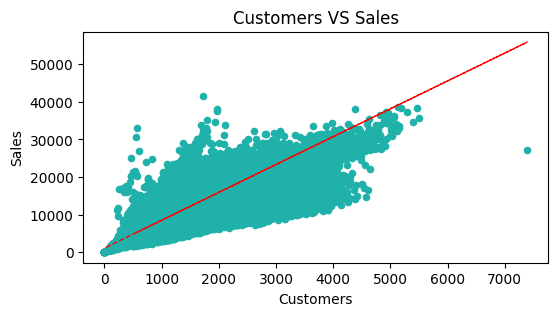

In [ ]:
# Chart - 8 visualization code

dataset.plot(kind="scatter", x="Customers",y="Sales",title="Customers VS Sales",figsize=(6,3), color= 'lightseagreen')
z = np.polyfit(dataset['Customers'], dataset['Sales'], 1)
y_hat = np.poly1d(z)(dataset['Customers'])
plt.plot(dataset['Customers'], y_hat, "r--", lw=1)
plt.show()

1. Why did you pick the specific chart?

Scatter plot is very useful for showing linear relationships.
From this chart we'll see whether there is a linear relationship between Customers and Sales.
There should be a linear relationship beacuse if there is not a linear relationship that could imply that customers are visiting the shop but not buying. This is harmful for the buisness.

 2. What is/are the insight(s) found from the chart?

The relationship is linear implying the almost all the customers who are visiting making purchases.But still there are some outliers.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The people who are visiting and not making any purchases can be due to unavailability of product they desired. So to remove the outliers the product availability should be managed.

####Chart 9: Sales VS Months-Year

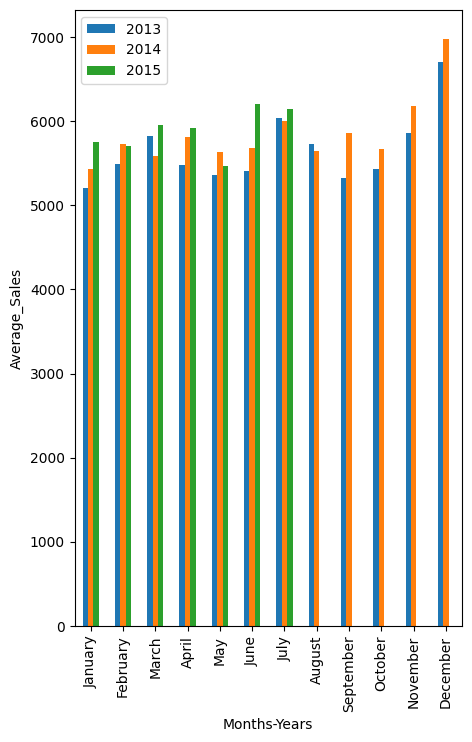

In [ ]:
# Chart - 9 visualization code

df3 = dataset.groupby(['Year','Month'])['Sales'].mean().sort_index()
df4 = pd.DataFrame()
df4['2013']=df3[2013].to_list()
df4['2014']=df3[2014].to_list()
df4['2015'] = 0
for i in range(0,7):
  df4['2015'][i]=df3[2015][i+1]

df4.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']

df4.plot.bar(figsize=(5, 8),xlabel="Months-Years",ylabel="Average_Sales")
plt.show()


1. Why did you pick the specific chart?

We have used grouped bar chart to show simultaneously the comparison between years and months altogether. 

 2. What is/are the insight(s) found from the chart?

Here we can see that the average sales are in a fixed zone. No significant boom in sales could be seen. Refurbishment might change the trend.
We can see that there is slow growth in sales. June-July and November-December periods have better sale in all the three years. And due to refurbishment in later months of 2015, there could not been any sales.
We can see from the chart above that from 2013 to 2014 sales has declined a bit.
Customers must be getting closed shops due to refurbishment and this accounts for decreasing trend in yearly sales.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To get more sales, refurbishment should be done as soon as possible and more promotions should be there for the months which have low sales. If this is not done then in some months like May, August and October there will always be low sales which will be bad for business.  

####Chart 10: Sales in different types of stores

Text(0, 0.5, 'Sales')

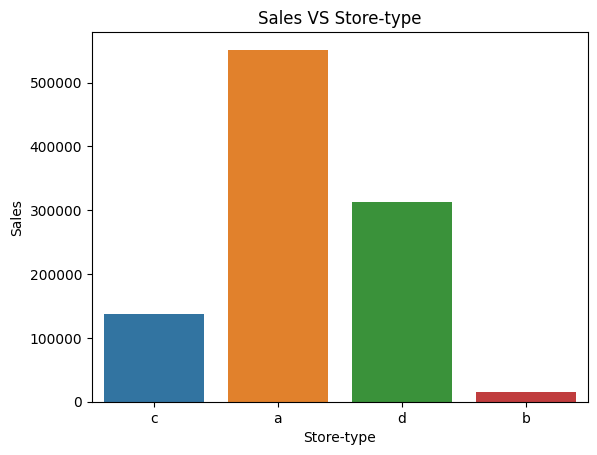

In [ ]:
# Chart - 10 visualization code

ax = sns.barplot(x="StoreType", y="Sales", data=dataset,estimator = np.size)
ax.set_title('Sales VS Store-type')
ax.set_xlabel("Store-type") 
ax.set_ylabel('Sales')


1. Why did you pick the specific chart?

This graph will help us to recognize which type of stores as maximum sales, so that that type stores can be constructed more or the quantity of the items in those store can be increased.

 2. What is/are the insight(s) found from the chart?

Store type a has the maximum sales. It is almost equal to the other type sales combined.
Rossman should focus more on the product and store management of store type b,c,d while maintaing type a.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To make a positive impact, it is necessary to either drop store type b or highly promote it. SO that store type b can have better sales. And c needs promotions too.

#### Chart 11: Sales on State Holidays

In [ ]:
# Chart - 1 visualization code


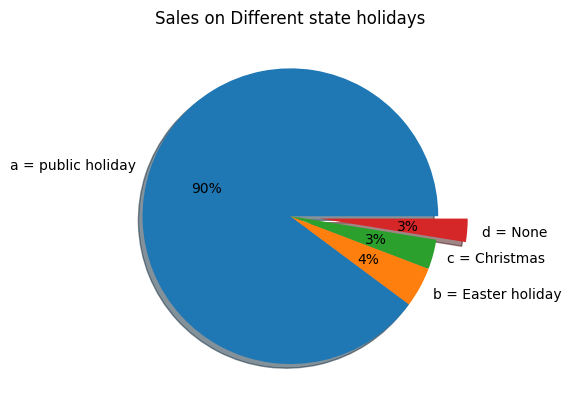

In [ ]:
dataset['StateHoliday']=dataset['StateHoliday'].replace(0,'d')
dataset['StateHoliday']=dataset['StateHoliday'].replace('0','d')

#Sales VS State Holiday
df5 = dataset.groupby(['StateHoliday'])['Sales'].mean().sort_values(ascending=False)

lab = ['a = public holiday', 'b = Easter holiday', 'c = Christmas', 'd = None']
plt.pie(df5, labels = lab, autopct='%.0f%%', explode= [0,0,0,.2],shadow=True)
plt.title("Sales on Different state holidays")
plt.show()



1. Why did you pick the specific chart?

We picked this chart so that we can show how much holidays contributes in sales of the stores. This clearly shows the difference between all the categories.

 2. What is/are the insight(s) found from the chart?

Maximum of the holiday sales are on type a holiday. 
The consumer base of Rossman stores consists of salaried based people who get their shopping done on public holidays.

 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 To get a positive growth maxumim of the shops must be open on public holidays for better sales. And the sales can decline if shops kept closed on public holidays. So Rossman should cleverly decide when to keep shops closed or open.

#### Chart 12 - Collinearity Heat Map

<Axes: >

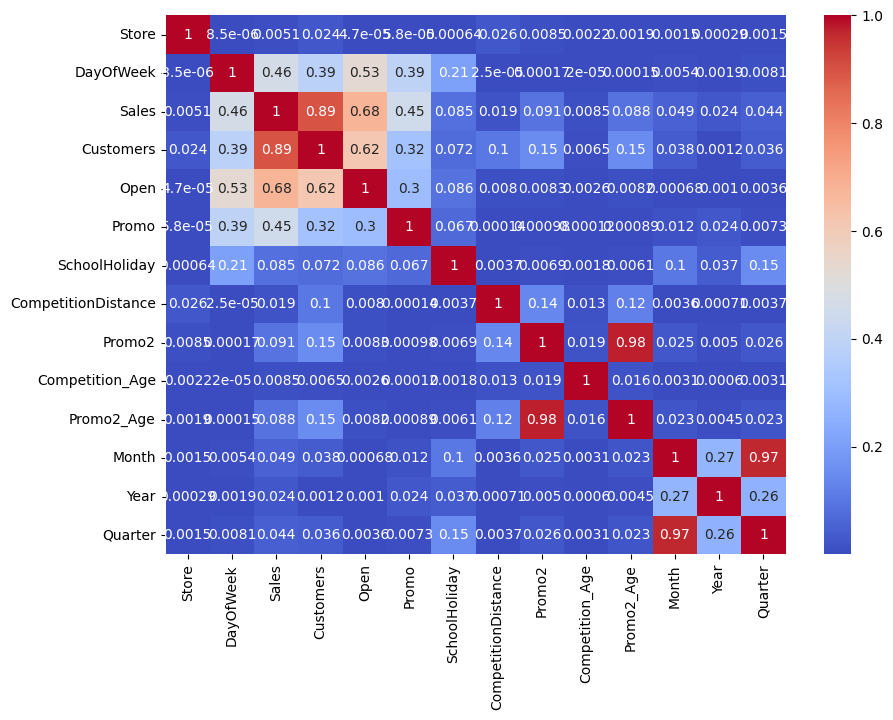

In [ ]:
# Chart - 12 visualization code

 ## Correlation
corr = dataset.corr()
plt.figure(figsize=(10,7))
sns.heatmap(abs(corr), annot=True, cmap='coolwarm')

1. Why did you pick the specific chart?

A correlation map is kind of a matrix which shows the dependency of each variable on every other variables. This table has correlation coefficients which shows the correlation between two variables.
The value of correlation lies between -1 and 1. Where 1 shows the maximum correlaion possible and -1 the least. This map is used to summarize data and with the help of it we can select/deselect features according to need. 


 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap we can deduce that:-
1. Customers and sales have a high correlation coefficient. This is obvious as customers brings sales.
2. Also the Sales and Open has high correlation and this can be accounted as the sales will only happend when stores are open. 
3. The secoond point also explains why customers and open has a high value.
4. Day of Week has significant affect on Sales because people might prefer buying meds on a day off only.

#### Chart 13- Pair Plot

In [ ]:
#Chart 13 - visualization code
#sns.pairplot(dataset, hue="Sales")

1. Why did you pick the specific chart?

A pair plot expresses the important features to explain the relationship between the two variables. It helps to form very simple classififcation models by making simple graphs and showing linear separation in data. Therefore, we used a pair plot to check out the patterns, relations and variations between the features of our dataset.
 It is somewhat same as correlation but it shows pictorially whereas correlation map shows the difference numerically.

## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
dataset['PromoInterval'].fillna(0, inplace=True)

In [ ]:
#This data also include the days when the stores were closed. Since those days do not contribute to the sales, so we can remove those rows when stores were closed.

dataset = dataset[dataset['Open']==1]

dataset.reset_index(inplace=True)

dataset.drop(['index','Open'],axis=1, inplace=True)

**New Column: MSP**

In [ ]:
#Lets name that column, money spent by a person(MSP)
#We can calculate MSP by dividing sales by customers.
dataset['MSP'] = dataset['Sales']/dataset['Customers'] 
#For 0 Customers 0 Sales day, we got Nan in the MSP column, replacing those values with 0
dataset['MSP'].replace(np.nan,0, inplace=True)

In [ ]:
dataset = dataset.drop(['Quarter','Promo2',],axis=1)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.025528
1,DayOfWeek,5.770426
2,Customers,5.859863
3,Promo,2.305107
4,SchoolHoliday,1.282403
5,CompetitionDistance,1.631860
6,Competition_Age,6.084831
7,Promo2_Age,2.183189
8,Month,4.171672
9,Year,52.778581


Outliers Treatment

Sales                     Axes(0.125,0.53;0.352273x0.35)
Customers              Axes(0.547727,0.53;0.352273x0.35)
CompetitionDistance       Axes(0.125,0.11;0.352273x0.35)
MSP                    Axes(0.547727,0.11;0.352273x0.35)
dtype: object

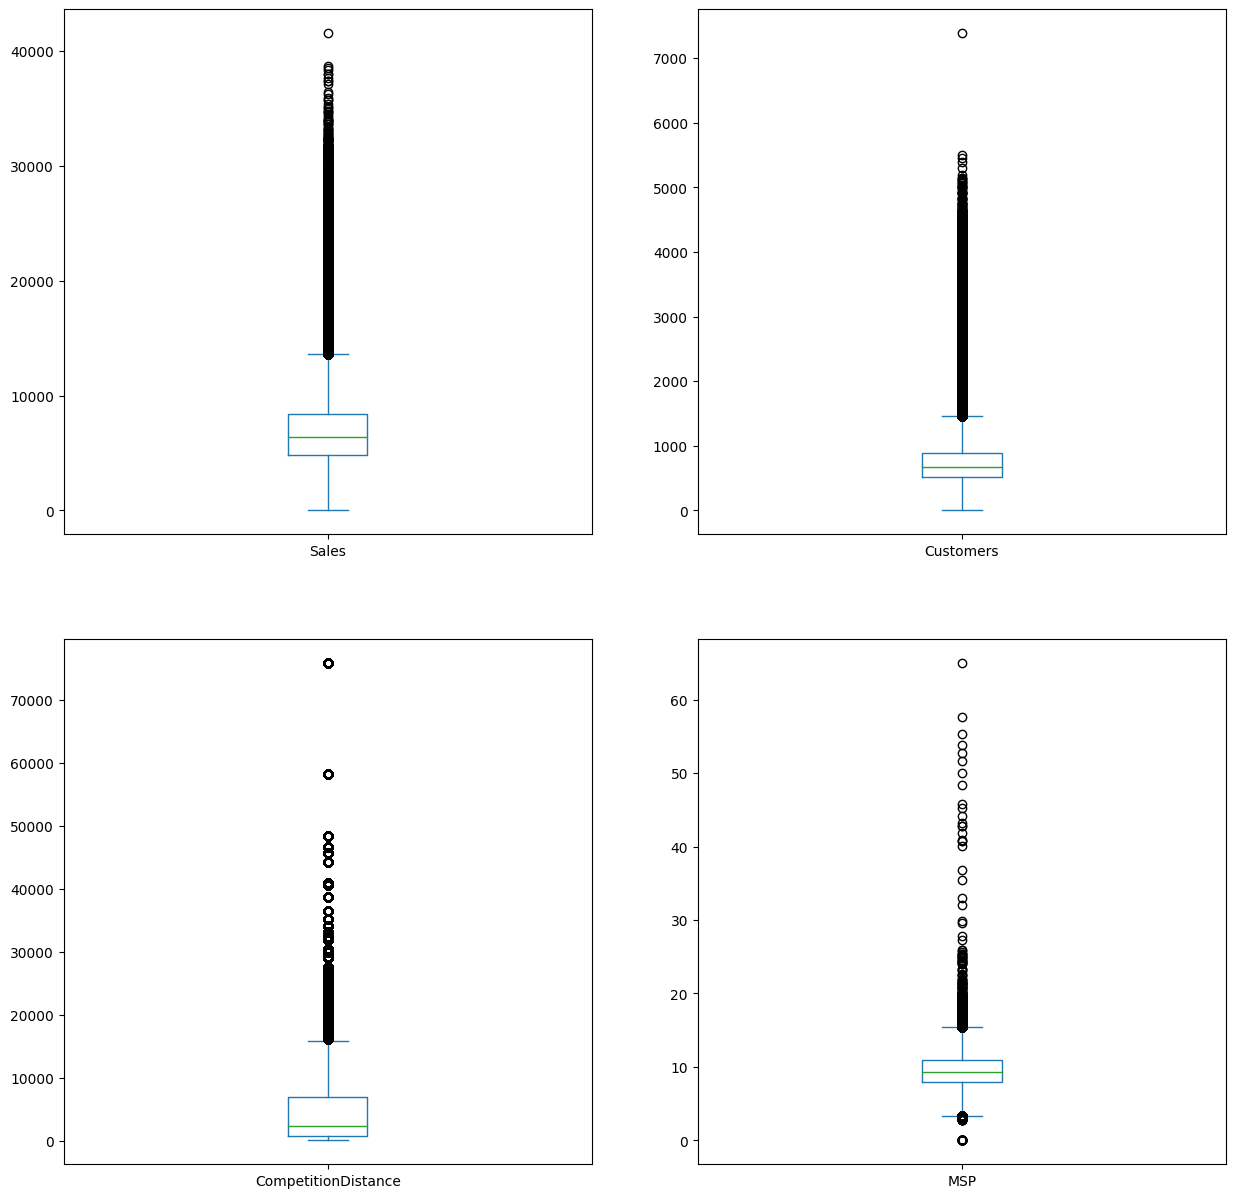

In [ ]:
dataset.plot(y=['Sales','Customers','CompetitionDistance','MSP'], kind="box", subplots=True, layout=(2,2), figsize=(15,15))

In [ ]:
def calculate_outlier(df,column): ## function for calculating outliers
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
    return lower, upper, percent_outliers

In [ ]:
#We can see that there are significant outliers in the columns above, so dealing with them one by one.

####Sales Outliers

In [ ]:
l_sales, h_sales, percent_sales = calculate_outlier(dataset, 'Sales')

print(f"lower:-  {l_sales} ")
print(f"upper:-  {h_sales} ")
print(f"outliers percent before treatment:-  {percent_sales} ")

#2.62% => 20,000 approx values are in outliers, which is very significant.
# We know that the sales is not less than 0 anywhere, so dealing with the upper outliers by replacing all the values greater than h_sales by h_sales.


lower:-  -392.5 
upper:-  13611.5 
outliers percent before treatment:-  3.64 


In [ ]:
#Treating Outliers
dataset['Sales'].loc[dataset['Sales']>=h_sales] = h_sales

####Customers outliers

In [ ]:
l_cust, h_cust, percent_cust = calculate_outlier(dataset, 'Customers')


print(f"lower:-  {l_cust} ")
print(f"upper:-  {h_cust} ")
print(f"outliers percent :-  {percent_cust} ")

lower:-  -42.0 
upper:-  1454.0 
outliers percent :-  4.84 


In [ ]:
#Treating Outliers
dataset['Customers'].loc[dataset['Customers']>=h_cust] = h_cust

####Competition Distance Outliers

In [ ]:
l_cd, h_cd, percent_cd = calculate_outlier(dataset, 'CompetitionDistance')

print(f"lower:-  {l_cd} ")
print(f"upper:-  {h_cd} ")
print(f"outliers percent :-  {percent_cd} ")

lower:-  -8545.0 
upper:-  16135.0 
outliers percent :-  9.83 


In [ ]:
#Treating Outliers
dataset['CompetitionDistance'].loc[dataset['CompetitionDistance']>=h_cd] = h_cd

####MSP Outliers

In [ ]:
l_msp, h_msp, percent_msp = calculate_outlier(dataset, 'MSP')

print(f"lower:-  {l_msp} ")
print(f"upper:-  {h_msp} ")
print(f"outliers percent :-  {percent_msp} ")

lower:-  3.388844543876737 
upper:-  15.406102074238545 
outliers percent :-  0.89 


In [ ]:
#Treating Outliers
dataset['MSP'].loc[dataset['MSP']>=h_cd] = h_cd

####CATEGORICAL ENCODING

In [ ]:
#Making a copy of the dataset

dataset_pr = dataset.copy()

In [ ]:
#Separating the categorical columns for encoding
categorical_columns = ['StateHoliday','StoreType','Assortment','PromoInterval']

In [ ]:
#Mapping the variables to numerical ones.

dataset_pr['PromoInterval'] = dataset_pr['PromoInterval'].map({'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3})
dataset_pr['StoreType'] = dataset_pr['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
dataset_pr['Assortment'] = dataset_pr['Assortment'].map({'a':1,'b':2,'c':3})
dataset_pr['StateHoliday'] = dataset_pr['StateHoliday'].map({'a':1,'b':2,'c':3,'d':4})


In [ ]:
dataset_pr['PromoInterval'].fillna(0,inplace=True)

In [ ]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=['DayOfWeek','StateHoliday', 'StoreType', 'Assortment','PromoInterval'])

####Scaling

In [ ]:
#Selecting features which will be used in training the data

features = [ 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Competition_Age', 'Promo2_Age', 'Month', 'Year',
       'MSP', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_1',
       'StateHoliday_2', 'StateHoliday_3', 'StateHoliday_4', 'StoreType_1',
       'StoreType_2', 'StoreType_3', 'StoreType_4', 'Assortment_1',
       'Assortment_2', 'Assortment_3', 'PromoInterval_0.0',
       'PromoInterval_1.0', 'PromoInterval_2.0', 'PromoInterval_3.0']

In [ ]:
Z= dataset_pr[features]

In [ ]:
#This step is to remove errors due to infinity when log applied.

dataset_pr['Sales'] = dataset_pr['Sales']+0.5

In [ ]:
#Scaling the features

scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(Z)

In [ ]:
#Dependent vairable assigning
y = dataset_pr['Sales']

####Train-Test Splitting

In [ ]:
#Train test Split

X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(675513, 31)
(168879, 31)


##ML Model Implementation

In [ ]:
#Calculating errors
def calc_errors(y_test, y_pred):
  MSE = mean_squared_error(y_test, y_pred)
  print(f"MSE:-  {MSE}" )
  RMSE = np.sqrt(MSE)
  print(f"RMSE:-  {RMSE}")
  rsq_score = r2_score(y_test, y_pred)
  print(f"r2_score:-  {rsq_score}")

### ML Model 1 - Linear Regression

In [ ]:
# ML Model - 1 Implementation

# Linear Regression
lin_reg = LinearRegression()

#Fit model
lin_reg.fit(X_train, y_train)

#prediction
y_pred_lr = lin_reg.predict(X_test)

#actual
actual = y_test

train_score_lr = lin_reg.score(X_train, y_train)
test_score_lr = lin_reg.score(X_test, y_test)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print("\n Linear Regression Model............................................\n")

print(f"The train score for linear regression model is {train_score_lr}")
print(f"The test score for linear regression model is {test_score_lr}")

print('Errors :- ')
calc_errors(y_test, y_pred_lr)



 Linear Regression Model............................................

The train score for linear regression model is 0.9548529734790339
The test score for linear regression model is 0.955118186948691
Errors :- 
MSE:-  330126.6506617026
RMSE:-  574.5664893306106
r2_score:-  0.955118186948691


We have used Linear Regression as our first model.The train score we got is 0.95 and test score is 0.95 again, which are both in the acceptable range. 
Then we used three evaluation metrics RMSE, MSE and r-squared. The values of MSE is way too large that's why we took RMSE and for better results we used r squared because it shows how well the data fit in the model. And that results came out to be well i.e. 0.95.

### ML Model 2 - Ridge Regression

In [ ]:
#Ridge Regression Model

ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#prediction
y_pred_rid = ridgeReg.predict(X_test)

#train and test score for ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)



Ridge Model............................................

For alpha = 10
The train score for ridge model is 0.9548529253492825
The test score for ridge model is 0.9551183443988893

Errors :- 
MSE:-  330125.4925421198
RMSE:-  574.5654815093923
r2_score:-  0.9551183443988893


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

print("\nRidge Model............................................\n")
print(f"For alpha = {10}")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))
print()
print('Errors :- ')
calc_errors(y_test, y_pred_rid)


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV

# list of alpha to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge regression
ridge = Ridge()

# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring = metrics.get_scorer(r2_score),
                       cv=5,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,y_train)
# Predict on the model

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True,
             scoring=<function r2_score at 0x7fd4ff3d8310>, verbose=1)

In [ ]:
# checking best alpha from model_cv

grid_cv_model.best_params_

{'alpha': 0.0001}

##### Which hyperparameter optimization technique have you used and why?


We have used Grid Search because it uses all possible combinations. Then the models are evaluated through cross validation. That is why we have chosen this so that we create a model for each combination of hyperparameters and get the best model with best hyerparameters.

### ML Model 3 - Lasso Regression

In [ ]:

#Lasso regression model
print("\nLasso Model............................................\n")

lasso = Lasso(alpha = 5)

lasso.fit(X_train,y_train)

#prediction
y_pred_las = lasso.predict(X_test)

train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)



Lasso Model............................................

For alpha = 5
The train score for ls model is 0.9547601680883107
The test score for ls model is 0.9550399758789927

Errors :- 
MSE:-  330701.9295269897
RMSE:-  575.0668913500322
r2_score:-  0.9550399758789927


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(f"For alpha = {5}")
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))
print()
print('Errors :- ')
calc_errors(y_test, y_pred_las)


For alpha = 5
The train score for ls model is 0.9547601680883107
The test score for ls model is 0.9550399758789927

Errors :- 
MSE:-  330701.9295269897
RMSE:-  575.0668913500322
r2_score:-  0.9550399758789927


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Initialising Lasso()
lasso = Lasso()

#usig same attributes used for Ridge tuning except estimator here would be lasso
grid_cv_model = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring=metrics.get_scorer(r2_score),
                       cv=5,
                       return_train_score=True,
                       verbose=1)
#fiting model_cv
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True,
             scoring=<function r2_score at 0x7fd4ff3d8310>, verbose=1)

In [ ]:
# Checking best  alpha from model_cv

grid_cv_model.best_params_

{'alpha': 0.0001}

##### Which hyperparameter optimization technique have you used and why?


We have used Grid Search because it uses all possible combinations. Then the models are evaluated through cross validation. That is why we have chosen this so that we create a model for each combination of hyperparameters and get the best model with best hyerparameters.